In [2]:
!pip install yfinance


  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=87f947d6117a6ca944bb393ee73487463a8bf700b1a6a78108293ca278bbb1f0
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/aa/8a/36/59ed4f6fbcb6100967618eeb0696046bf9777a41ac2ff1f9b9
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8366 sha256=6a23a8db2b20140f94cb42f0a9e6ea2a45516a71e6dddd2b538231a4e8365147
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/ae/25/47/4d68431a7ec1b6c4b5233365934b74c1d4e665bf5f968d363a
Successfully built yfinance multitasking


In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import datetime

In [24]:
bpcl = yf.download("BPCL.NS", start="2019-01-01", end="2021-01-01",group_by="ticker")
hind = yf.download("HINDALCO.NS", start="2019-01-01", end="2021-01-01",group_by="ticker")
hp = yf.download("HINDPETRO.NS", start="2019-01-01", end="2021-01-01",group_by="ticker")
mgl = yf.download("MGL.NS", start="2019-01-01", end="2021-01-01",group_by="ticker")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [22]:
bpcl

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,361.049988,369.299988,360.000000,367.200012,308.717041,1552711
2019-01-02,366.000000,366.000000,346.750000,357.950012,300.940308,9862795
2019-01-03,352.000000,354.799988,348.149994,352.500000,296.358276,4986130
2019-01-04,351.799988,361.700012,351.500000,359.450012,302.201385,3858610
2019-01-07,360.000000,362.799988,354.000000,355.549988,298.922516,2895410
...,...,...,...,...,...,...
2020-12-24,376.399994,381.250000,375.549988,377.549988,363.096588,6065886
2020-12-28,380.000000,384.500000,378.500000,382.750000,368.097534,4903064
2020-12-29,384.500000,385.600006,377.649994,381.500000,366.895386,4017007


In [27]:
bpcl.iloc[0]['Adj Close']

308.717041015625

In [30]:
for stock_df in (bpcl,hind,mgl,hp):
    stock_df['Normed Return'] = stock_df['Adj Close']/stock_df.iloc[0]['Adj Close']

In [32]:
hind = hind[['Adj Close','Normed Return']]
bpcl = bpcl[['Adj Close','Normed Return']]
mgl = mgl[['Adj Close','Normed Return']]
hp = hp[['Adj Close','Normed Return']]


In [35]:
mgl.head()

,Adj Close,Normed Return
Date,,
2019-01-01,852.388123,1.000000
2019-01-02,840.990479,0.986629
2019-01-03,832.255493,0.976381
2019-01-04,839.308899,0.984656
2019-01-07,846.175476,0.992711


In [34]:
mgl.tail()

,Adj Close,Normed Return
Date,,
2020-12-24,1042.780884,1.223364
2020-12-28,1044.219482,1.225052
2020-12-29,1074.133667,1.260146
2020-12-30,1062.029175,1.245946
2020-12-31,1052.901001,1.235237


# Allocations

Let's pretend we had the following allocations for our total portfolio:

30% in Apple
20% in Google/Alphabet
40% in Amazon
10% in IBM
Let's have these values be reflected by multiplying our Norme Return by out Allocations

In [133]:
for stock_df,allo in zip([bpcl,hind,hp,mgl],[.2,.2,.2,.4]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [134]:
bpcl.head()

,Adj Close,Normed Return,Allocation,Position Values
Date,,,,
2019-01-01,308.717041,1.000000,0.200000,250000.000000
2019-01-02,300.940308,0.974810,0.194962,243702.377610
2019-01-03,296.358276,0.959967,0.191993,239991.834750
2019-01-04,302.201385,0.978894,0.195779,244723.602319
2019-01-07,298.922516,0.968273,0.193655,242068.363708


In [135]:
for stock_df in [bpcl,hind,hp,mgl]:
    stock_df['Position Values'] = stock_df['Allocation']*1000000

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [136]:
hp.head()

,Adj Close,Normed Return,Allocation,Position Values
Date,,,,
2019-01-01,231.570267,1.000000,0.200000,200000.000000
2019-01-02,231.434921,0.999416,0.199883,199883.106358
2019-01-03,223.992584,0.967277,0.193455,193455.392523
2019-01-04,223.902359,0.966887,0.193377,193377.467821
2019-01-07,225.345734,0.973120,0.194624,194624.065370


In [137]:
position_val = pd.concat([bpcl['Position Values'],hp['Position Values'],hind['Position Values'],mgl['Position Values']],axis=1)

In [138]:
position_val 

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2019-01-01,200000.000000,200000.000000,200000.000000,400000.000000
2019-01-02,194961.902088,199883.106358,192637.485274,394651.429910
2019-01-03,191993.467800,193455.392523,187833.887262,390552.365120
2019-01-04,195778.881855,193377.467821,189360.266662,393862.315400
2019-01-07,193654.690966,194624.065370,187250.283434,397084.592654
...,...,...,...,...
2020-12-24,235229.378294,184522.820584,215305.541394,489345.572136
2020-12-28,238469.203364,185861.509764,217986.067658,490020.663023
2020-12-29,237690.400592,186034.240876,214078.866933,504058.486300


In [139]:
position_val.columns=['BPCL Pos','HP Pos','HIND Pos','MGL Pos',]

In [140]:
position_val

,BPCL Pos,HP Pos,HIND Pos,MGL Pos
Date,,,,
2019-01-01,200000.000000,200000.000000,200000.000000,400000.000000
2019-01-02,194961.902088,199883.106358,192637.485274,394651.429910
2019-01-03,191993.467800,193455.392523,187833.887262,390552.365120
2019-01-04,195778.881855,193377.467821,189360.266662,393862.315400
2019-01-07,193654.690966,194624.065370,187250.283434,397084.592654
...,...,...,...,...
2020-12-24,235229.378294,184522.820584,215305.541394,489345.572136
2020-12-28,238469.203364,185861.509764,217986.067658,490020.663023
2020-12-29,237690.400592,186034.240876,214078.866933,504058.486300


In [141]:
position_val['Total Pos'] = position_val.sum(axis=1)

In [142]:
position_val

,BPCL Pos,HP Pos,HIND Pos,MGL Pos,Total Pos
Date,,,,,
2019-01-01,200000.000000,200000.000000,200000.000000,400000.000000,1.000000e+06
2019-01-02,194961.902088,199883.106358,192637.485274,394651.429910,9.821339e+05
2019-01-03,191993.467800,193455.392523,187833.887262,390552.365120,9.638351e+05
2019-01-04,195778.881855,193377.467821,189360.266662,393862.315400,9.723789e+05
2019-01-07,193654.690966,194624.065370,187250.283434,397084.592654,9.726136e+05
...,...,...,...,...,...
2020-12-24,235229.378294,184522.820584,215305.541394,489345.572136,1.124403e+06
2020-12-28,238469.203364,185861.509764,217986.067658,490020.663023,1.132337e+06
2020-12-29,237690.400592,186034.240876,214078.866933,504058.486300,1.141862e+06


In [143]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Portfolio Value')

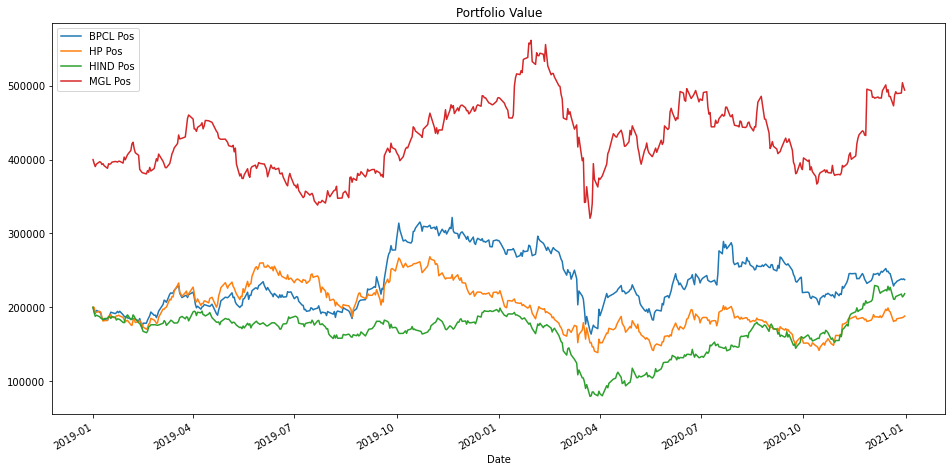

In [144]:
position_val[['BPCL Pos','HP Pos','HIND Pos','MGL Pos']].plot(figsize=(16,8))
plt.title('Portfolio Value')


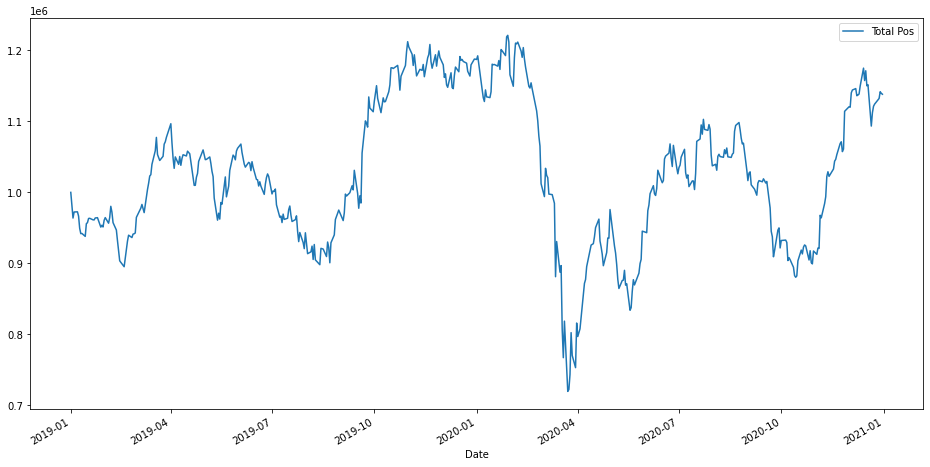

In [145]:
position_val.drop(['BPCL Pos','HP Pos','HIND Pos','MGL Pos'],axis=1).plot(kind='line',figsize=(16,8))
plt.legend()

In [146]:
position_val['Daily Return'] = position_val['Total Pos'].pct_change(1)

In [147]:
position_val

,BPCL Pos,HP Pos,HIND Pos,MGL Pos,Total Pos,Daily Return
Date,,,,,,
2019-01-01,200000.000000,200000.000000,200000.000000,400000.000000,1.000000e+06,NaN
2019-01-02,194961.902088,199883.106358,192637.485274,394651.429910,9.821339e+05,-0.017866
2019-01-03,191993.467800,193455.392523,187833.887262,390552.365120,9.638351e+05,-0.018632
2019-01-04,195778.881855,193377.467821,189360.266662,393862.315400,9.723789e+05,0.008864
2019-01-07,193654.690966,194624.065370,187250.283434,397084.592654,9.726136e+05,0.000241
...,...,...,...,...,...,...
2020-12-24,235229.378294,184522.820584,215305.541394,489345.572136,1.124403e+06,0.002717
2020-12-28,238469.203364,185861.509764,217986.067658,490020.663023,1.132337e+06,0.007056
2020-12-29,237690.400592,186034.240876,214078.866933,504058.486300,1.141862e+06,0.008411


In [148]:
cum_ret = 100 * (position_val['Total Pos'][-1]/position_val['Total Pos'][0] -1 )
print('Our return {} was percent!'.format(cum_ret))

Our return 13.830594360251114 was percent!


In [149]:
position_val['Daily Return'].mean()

0.000462949773549139

In [150]:
position_val['Daily Return'].std()

0.019895187545700313

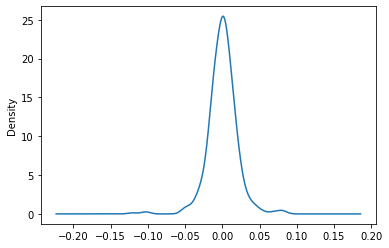

In [151]:
position_val['Daily Return'].plot(kind='kde')

# Sharpe Ratio

In [152]:
SR = position_val['Daily Return'].mean()/position_val['Daily Return'].std()

In [153]:
SR

0.023269435007120115

In [154]:
ASR=(52**0.5)*SR

In [155]:
ASR

0.16779828213849665

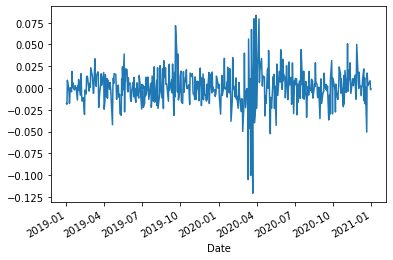

In [156]:
position_val['Daily Return'].plot(kind='line')

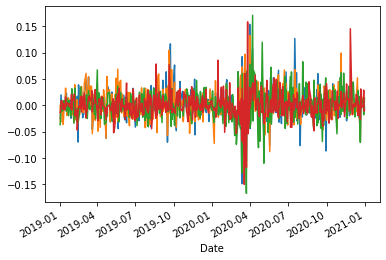

In [157]:
bpcl['Adj Close'].pct_change(1).plot(kind='line')
hp['Adj Close'].pct_change(1).plot(kind='line')
hind['Adj Close'].pct_change(1).plot(kind='line')
mgl['Adj Close'].pct_change(1).plot(kind='line')

In [158]:

np.sqrt(252)* (np.mean(.001-0.0002)/.001)

12.699606293110037